In [74]:
#importing libraries for data manipulation
import pandas as pd 
import numpy as np 

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
#loading the dataset from excel
lp = pd.read_excel(r"C:\Users\hp\Downloads\laptop_prices.xlsx")
lp.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [76]:
lp.shape

(1275, 23)

In [77]:
lp.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [78]:
lp.info

<bound method DataFrame.info of      Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6

In [79]:
lp.describe

<bound method NDFrame.describe of      Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15

In [80]:
lp['Ram'] = lp['Ram'].astype(str).str.replace('GB', '',regex=False).astype(int)

In [8]:
lp['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: int32

In [81]:
lp['PrimaryStorage'] = lp['PrimaryStorage'].fillna(0)

In [82]:
lp.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [83]:
#viewing value counts of key categorial columns to understand data distribution
lp['Company'].value_counts()
lp['TypeName'].value_counts()
lp['OS'].value_counts()
lp['Touchscreen'].value_counts()
lp['CPU_company'].value_counts()
lp['PrimaryStorageType'].value_counts()
lp['SecondaryStorageType'].value_counts()
lp['GPU_company'].value_counts()
lp['RetinaDisplay'].value_counts()
lp['IPSpanel'].value_counts()
lp['Screen'].value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

## Categorical Feature Visualizations (Bar+pie charts)

Text(0.5, 1.0, 'Laptop Brand Distribution')

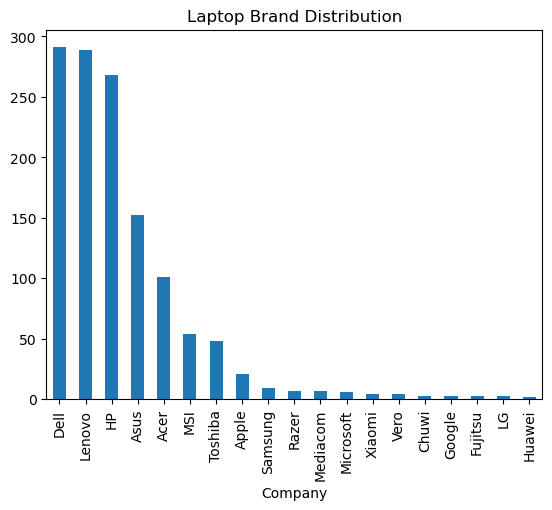

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
lp['Company'].value_counts().plot(kind='bar')
plt.title('Laptop Brand Distribution')

Text(0.5, 1.0, 'Type Breakdown')

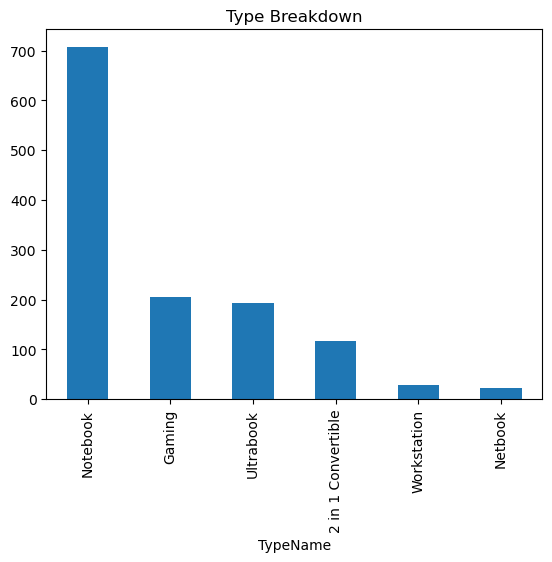

In [85]:
lp['TypeName'].value_counts().plot(kind='bar')
plt.title('Type Breakdown')

Text(0.5, 1.0, 'Operating System Distribution')

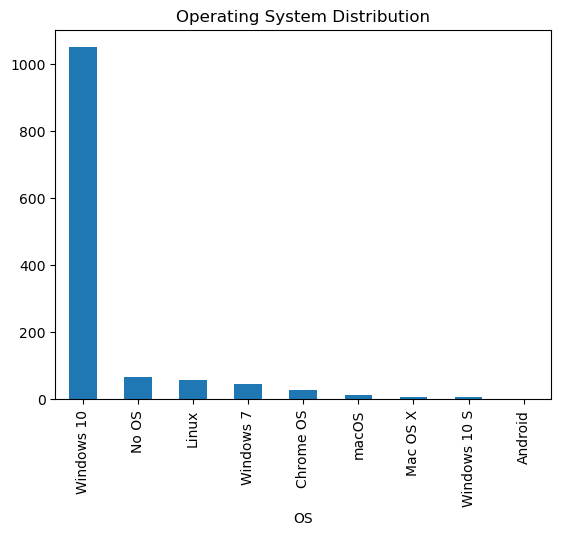

In [86]:
lp['OS'].value_counts().plot(kind='bar')
plt.title('Operating System Distribution')

Text(0.5, 1.0, 'TouchScreen Availability')

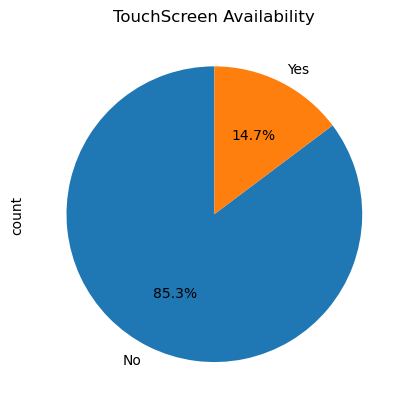

In [87]:
lp['Touchscreen'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('TouchScreen Availability', loc='center')

Text(0.5, 1.0, 'CPU Manufacturer Market Split')

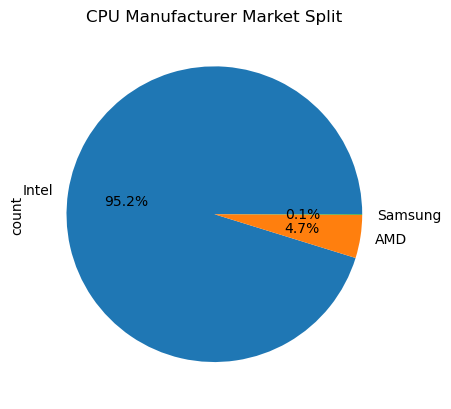

In [88]:
lp['CPU_company'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('CPU Manufacturer Market Split', loc='center')

Text(0.5, 1.0, 'Primary Storage Type Dsitribution')

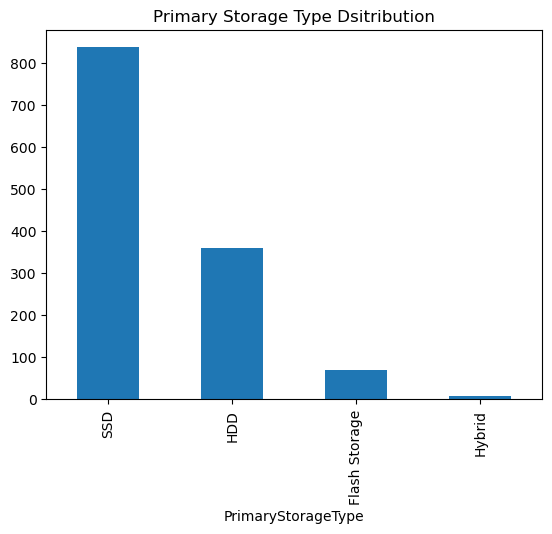

In [89]:
lp['PrimaryStorageType'].value_counts().plot(kind='bar')
plt.ylabel='count'
plt.title('Primary Storage Type Dsitribution')

Text(0.5, 1.0, 'Secondary Storage Type Breakdown')

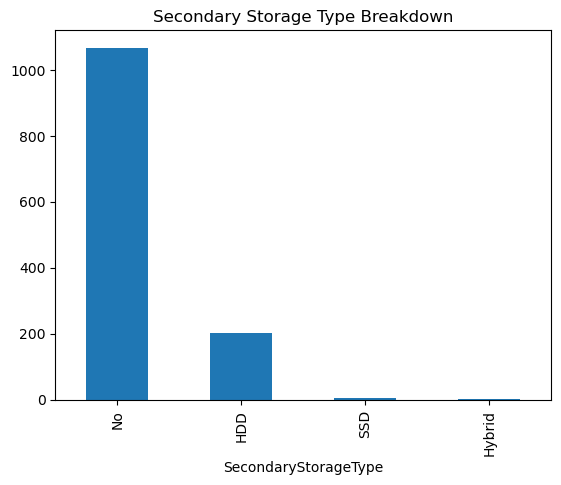

In [90]:
lp['SecondaryStorageType'].value_counts().plot(kind='bar')
plt.title('Secondary Storage Type Breakdown')

Text(0.5, 1.0, 'GPU Brand Market Share')

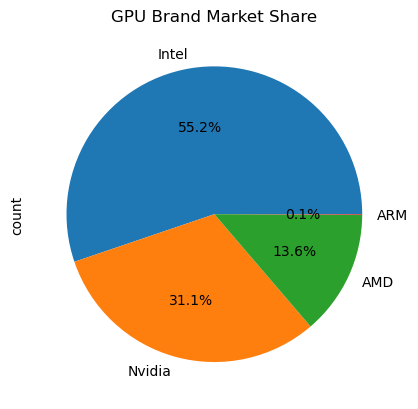

In [91]:
lp['GPU_company'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('GPU Brand Market Share', loc='center')

Text(0.5, 1.0, 'Retina Display inclusion')

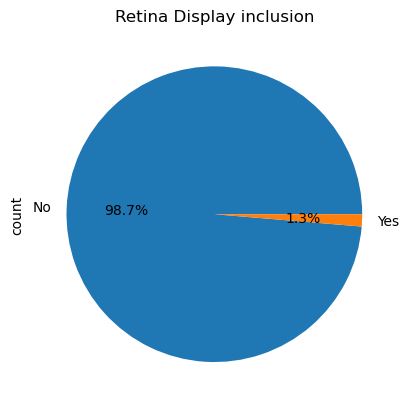

In [92]:
lp['RetinaDisplay'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Retina Display inclusion')

Text(0.5, 1.0, 'IPS Panel Presence in Laptops')

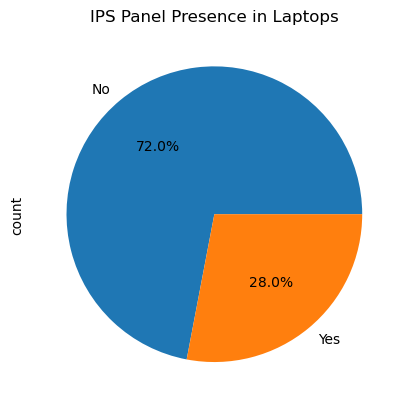

In [93]:
lp['IPSpanel'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('IPS Panel Presence in Laptops')

Text(0.5, 1.0, 'Screen Resolution Frequency')

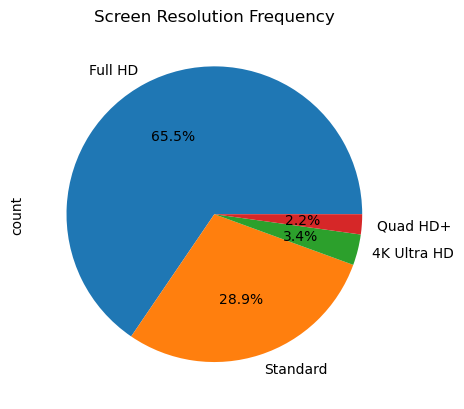

In [94]:
lp['Screen'].value_counts().plot(kind='pie',autopct='%1.1f%%') 
plt.xlabel='Screen'
plt.title('Screen Resolution Frequency')

### Model Training And Evaluation
Linear Regression gave reliable price predictions with minimal error and strong R-squared score.

In [95]:
categorical_cols = ['Company', 'TypeName', 'OS', 'CPU_company', 'GPU_company',
                    'PrimaryStorageType', 'SecondaryStorageType','Screen']

In [96]:
lp_encoded = pd.get_dummies(lp, columns=categorical_cols, drop_first=True)

In [97]:
binary_flags = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
for col in binary_flags:
    lp_encoded[col] = lp[col].map({'Yes':1,'No':0})

In [98]:
X = lp_encoded.drop(['Price_euros', 'Product', 'CPU_model', 'GPU_model'], axis=1)
y = lp_encoded['Price_euros']

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 116404.72
R-squared: 0.77


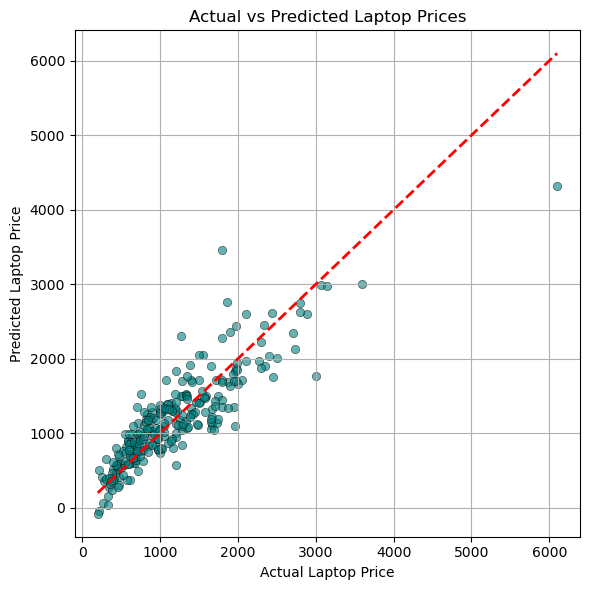

In [102]:
#ploting actual vs predicted prices to assess model accuracy
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='teal', alpha=0.6, edgecolor='black')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Laptop Price')
ax.set_ylabel('Predicted Laptop Price')
ax.set_title('Actual vs Predicted Laptop Prices')
ax.grid(True)
fig.tight_layout()
plt.show()

### Feature Wise Price Distribution with Box Plots
Visual comparison of how laptop prices varies across feature

In [103]:
import matplotlib.pyplot as plt

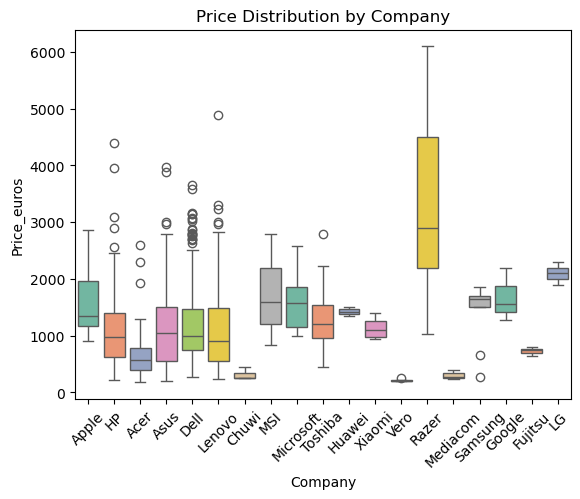

In [104]:
sns.boxplot(x='Company', y='Price_euros', data=lp,hue='Company',palette='Set2',legend= False)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.show()


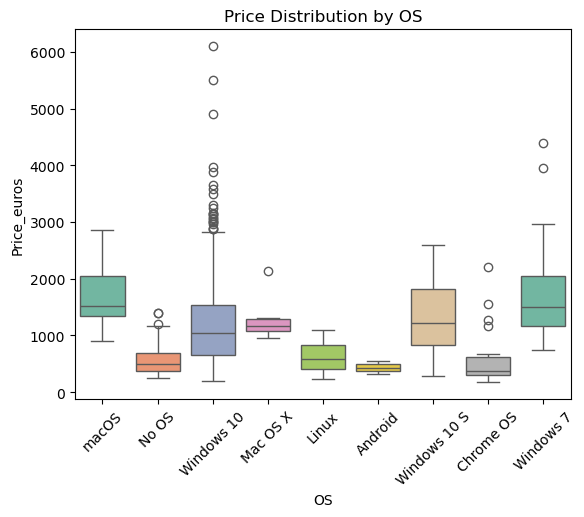

In [105]:
sns.boxplot(x='OS', y='Price_euros', data=lp,hue='OS',palette='Set2',legend= False)
plt.xticks(rotation=45)
plt.title('Price Distribution by OS')
plt.show()


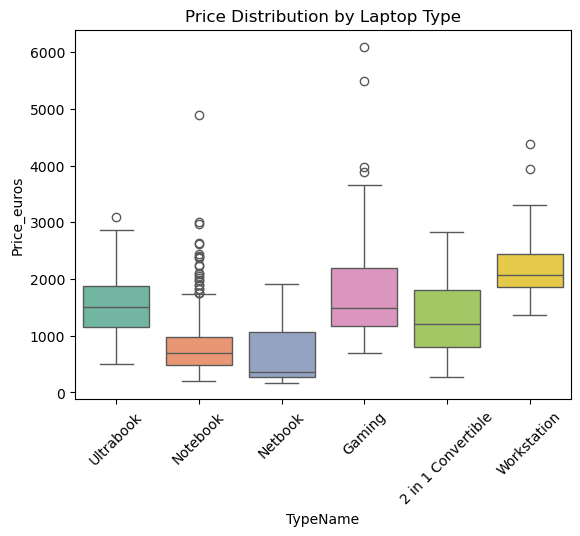

In [106]:
sns.boxplot(x='TypeName', y='Price_euros', data=lp,hue='TypeName',palette='Set2',legend= False)
plt.xticks(rotation=45)
plt.title('Price Distribution by Laptop Type')
plt.show()


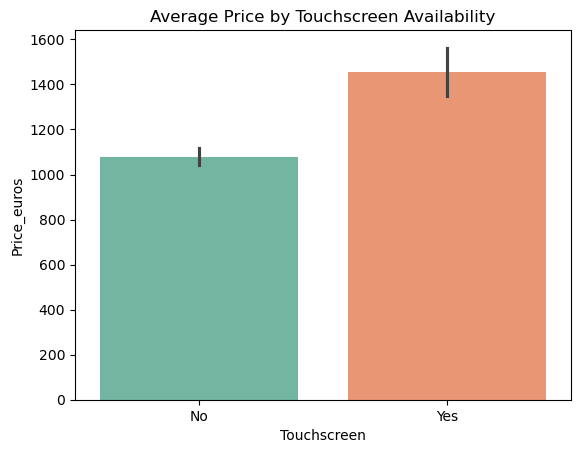

In [107]:
sns.barplot(x='Touchscreen', y='Price_euros', data=lp,hue='Touchscreen',palette='Set2',legend= False)
plt.title('Average Price by Touchscreen Availability')
plt.show()

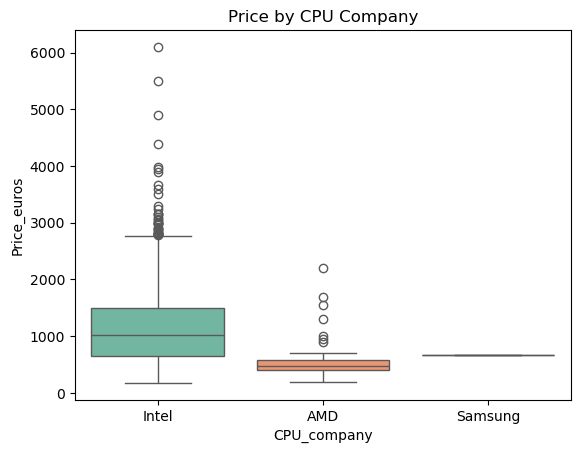

In [108]:
sns.boxplot(x='CPU_company', y='Price_euros', data=lp,hue='CPU_company',palette='Set2',legend= False)
plt.title('Price by CPU Company')
plt.show()


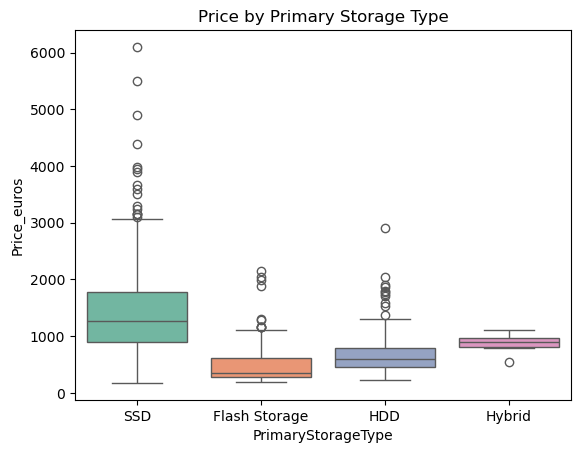

In [109]:
sns.boxplot(x='PrimaryStorageType', y='Price_euros',data=lp,hue='PrimaryStorageType',palette='Set2',legend= False)
plt.title('Price by Primary Storage Type')
plt.show()

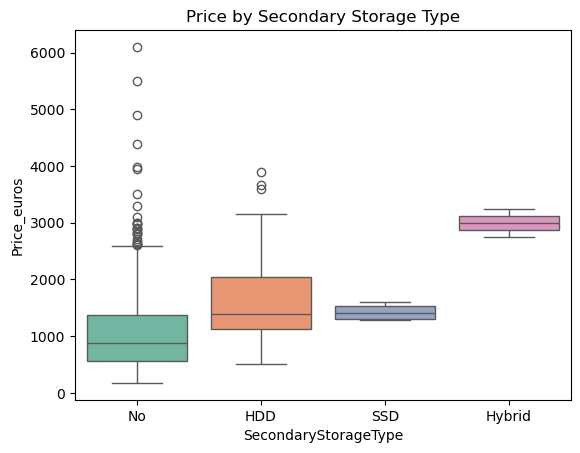

In [110]:
sns.boxplot(x='SecondaryStorageType', y='Price_euros', data=lp,hue='SecondaryStorageType',palette='Set2',legend= False)
plt.title('Price by Secondary Storage Type')
plt.show()

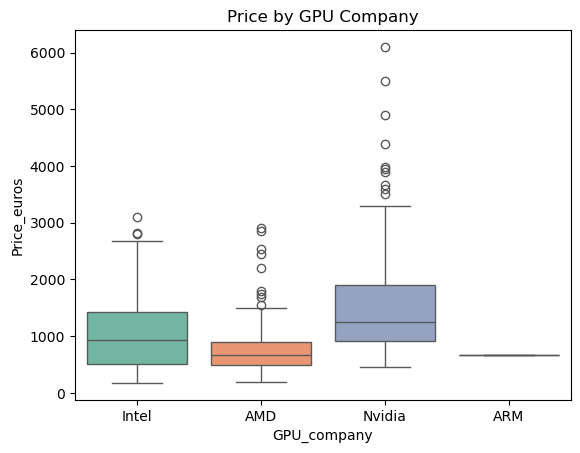

In [111]:
sns.boxplot(x='GPU_company', y='Price_euros', data=lp,hue='GPU_company',palette='Set2',legend= False)
plt.title('Price by GPU Company')
plt.show()


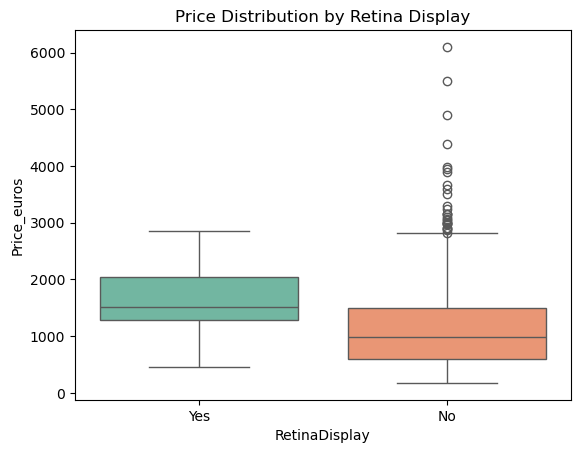

In [112]:
sns.boxplot(x='RetinaDisplay', y='Price_euros', data=lp,hue='RetinaDisplay',palette='Set2',legend= False)
plt.title('Price Distribution by Retina Display')
plt.show()


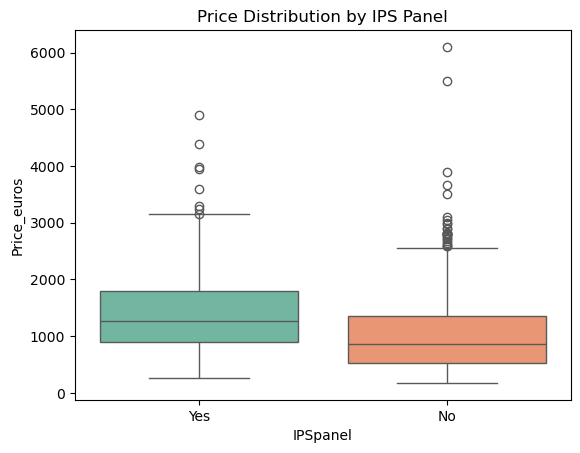

In [113]:
sns.boxplot(x='IPSpanel', y='Price_euros', data=lp,hue='IPSpanel',palette='Set2',legend= False)
plt.title('Price Distribution by IPS Panel')
plt.show()


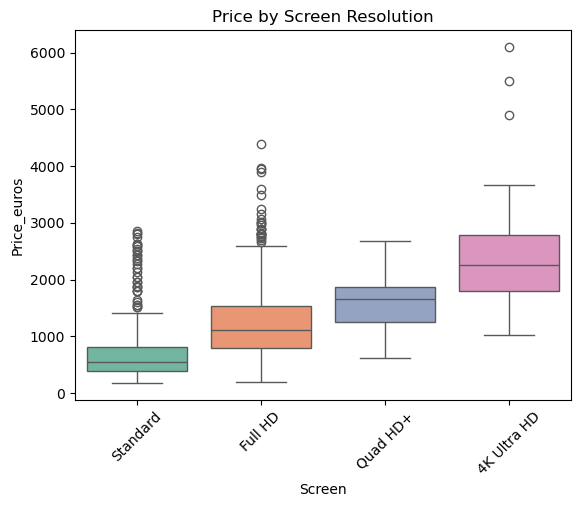

In [114]:
sns.boxplot(x='Screen', y='Price_euros', data=lp, hue='Screen', palette='Set2',legend= False)
plt.xticks(rotation=45)
plt.title('Price by Screen Resolution')
plt.show()
